# Keşifsel Veri Analizi (Exploratory Data Analysis - EDA)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Excel dosyasının yolu
dosya_yolu = r"C:\Users\yusuf\OneDrive\Masaüstü\Laptop_Price_Prediction\cleaned_data.xlsx"

# Dosya yolunun var olup olmadığını kontrol et
if os.path.exists(dosya_yolu):
    print("Dosya mevcut!")
    # Dosyayı oku
    df_ = pd.read_excel(dosya_yolu)
    df = df_.copy()
else:
    print("Dosya yolu yanlış veya dosya mevcut değil.")

Dosya mevcut!


In [17]:
df.head()

,Ekran_Boyutu,Ekran_Karti,GPU_Bellek_Tipi,GPU_Gucu,GPU_Hafizasi,GPU_Tipi,Yenileme_Hizi,Max_CPU_Hizi_GHz,Panel_Tipi,RAM,RAM_Tipi,Renk,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Isletim_Sistemi,Islemci,Fiyat
0,"15,6",Nvidia GeForce RTX 4060,GDDR6,106,8,Harici,144,4.7,IPS,8,DDR5,renkli,512,8,Free Dos,Intel Core i5 12450H,34999.0
1,"15,6",Nvidia GeForce RTX 3050,GDDR6,106,6,Harici,120,4.7,VA,16,DDR5,siyah,512,24,Free Dos,Intel Core i7 13650HX,34899.0
2,"15,6",Nvidia GeForce RTX 2050,GDDR6,55,4,Harici,144,4.7,IPS,16,DDR4,siyah,500,14,Free Dos,Intel Core i7 12700H,28089.0
3,"15,6",Nvidia GeForce RTX 4050,GDDR6,105,6,Harici,144,4.4,Full HD,16,DDR5,gri,512,8,Free Dos,Intel Core i5 12450H,34999.0
4,"15,6",Nvidia GeForce RTX 3050,GDDR6,106,4,Harici,144,4.4,IPS,16,DDR4,siyah,500,8,Free Dos,Intel Core i5 12450H,26499.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ekran_Boyutu         1200 non-null   object 
 1   Ekran_Karti          1200 non-null   object 
 2   GPU_Bellek_Tipi      1200 non-null   object 
 3   GPU_Gucu             1200 non-null   int64  
 4   GPU_Hafizasi         1200 non-null   int64  
 5   GPU_Tipi             1200 non-null   object 
 6   Yenileme_Hizi        1200 non-null   int64  
 7   Max_CPU_Hizi_GHz     1200 non-null   float64
 8   Panel_Tipi           1200 non-null   object 
 9   RAM                  1200 non-null   int64  
 10  RAM_Tipi             1200 non-null   object 
 11  Renk                 1200 non-null   object 
 12  SSD_Kapasitesi       1200 non-null   int64  
 13  CPU_Cekirdek_Sayisi  1200 non-null   int64  
 14  Isletim_Sistemi      1200 non-null   object 
 15  Islemci              1200 non-null   o

In [19]:
df.describe()

,GPU_Gucu,GPU_Hafizasi,Yenileme_Hizi,Max_CPU_Hizi_GHz,RAM,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Fiyat
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,106.145833,7.150000,160.507500,4.724250,30.793333,1063.820000,12.559167,51632.860817
std,16.301974,2.633745,38.395487,0.208822,22.997928,938.071427,6.011374,31511.009878
min,45.000000,4.000000,60.000000,4.200000,8.000000,256.000000,1.000000,15049.000000
25%,106.000000,6.000000,144.000000,4.700000,16.000000,512.000000,8.000000,32932.750000
50%,106.000000,6.000000,144.000000,4.700000,24.000000,1024.000000,12.000000,42309.500000
75%,106.000000,8.000000,165.000000,4.900000,32.000000,1024.000000,16.000000,55206.870000
max,175.000000,16.000000,360.000000,5.000000,128.000000,8192.000000,24.000000,240081.200000


In [20]:
list(df.columns)

['Ekran_Boyutu',
 'Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'GPU_Tipi',
 'Yenileme_Hizi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci',
 'Fiyat']

In [21]:
df.isnull().sum()

Ekran_Boyutu           0
Ekran_Karti            0
GPU_Bellek_Tipi        0
GPU_Gucu               0
GPU_Hafizasi           0
GPU_Tipi               0
Yenileme_Hizi          0
Max_CPU_Hizi_GHz       0
Panel_Tipi             0
RAM                    0
RAM_Tipi               0
Renk                   0
SSD_Kapasitesi         0
CPU_Cekirdek_Sayisi    0
Isletim_Sistemi        0
Islemci                0
Fiyat                  0
dtype: int64

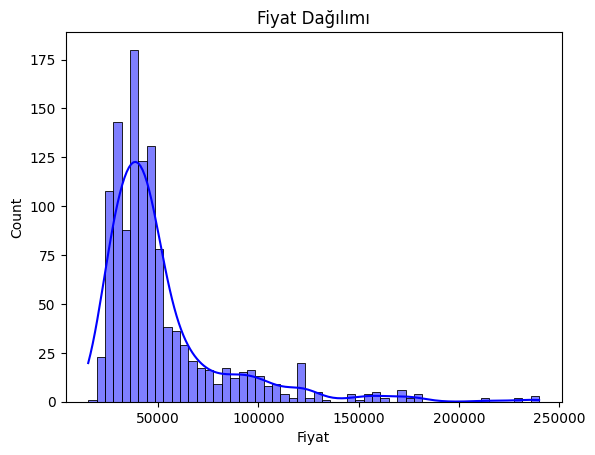

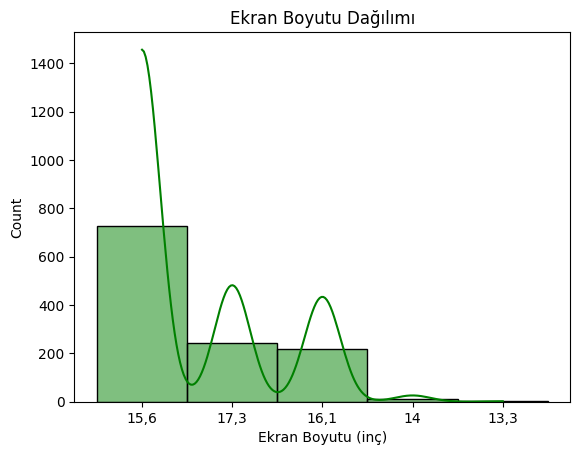

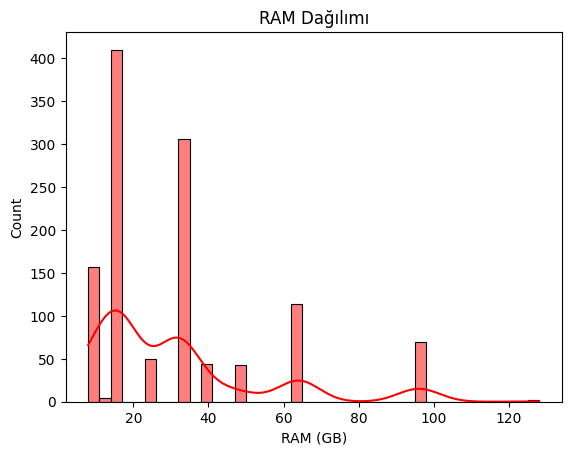

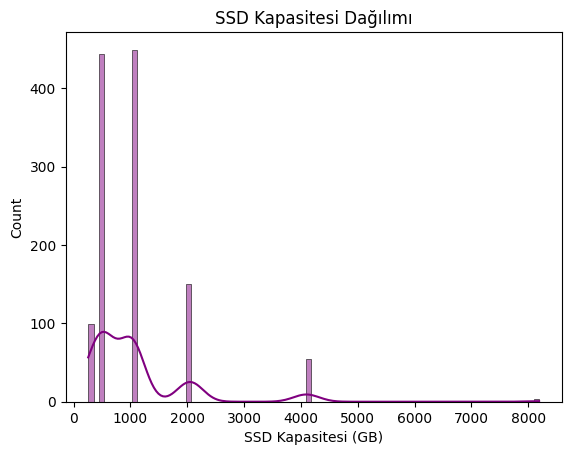

In [22]:
# Fiyat dağılımını görmek için histogram
sns.histplot(df['Fiyat'], kde=True, color='blue')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.show()

# Ekran Boyutu dağılımı için histogram
sns.histplot(df['Ekran_Boyutu'], kde=True, color='green')
plt.title('Ekran Boyutu Dağılımı')
plt.xlabel('Ekran Boyutu (inç)')
plt.show()

# RAM dağılımını görmek için histogram
sns.histplot(df['RAM'], kde=True, color='red')
plt.title('RAM Dağılımı')
plt.xlabel('RAM (GB)')
plt.show()

# SSD Kapasitesi dağılımını görmek için histogram
sns.histplot(df['SSD_Kapasitesi'], kde=True, color='purple')
plt.title('SSD Kapasitesi Dağılımı')
plt.xlabel('SSD Kapasitesi (GB)')
plt.show()

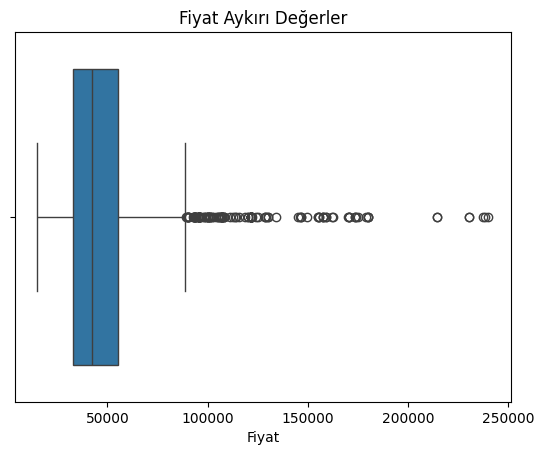

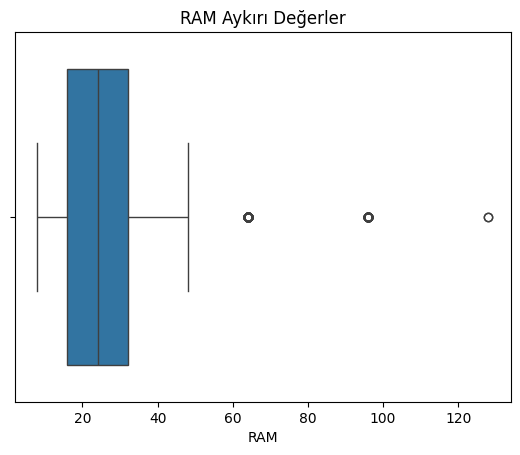

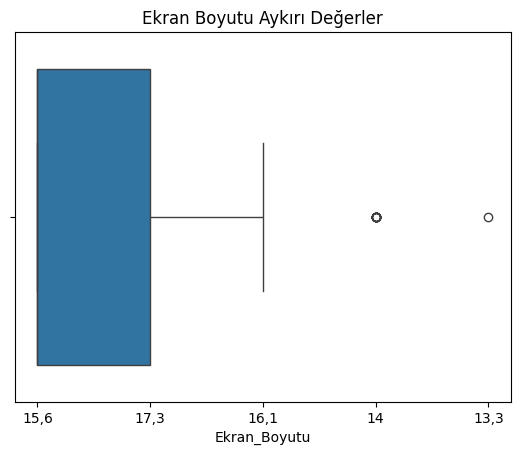

In [23]:
# Fiyat için boxplot
sns.boxplot(data=df, x='Fiyat')
plt.title('Fiyat Aykırı Değerler')
plt.show()

# RAM için boxplot
sns.boxplot(data=df, x='RAM')
plt.title('RAM Aykırı Değerler')
plt.show()

# Ekran Boyutu için boxplot
sns.boxplot(data=df, x='Ekran_Boyutu')
plt.title('Ekran Boyutu Aykırı Değerler')
plt.show()

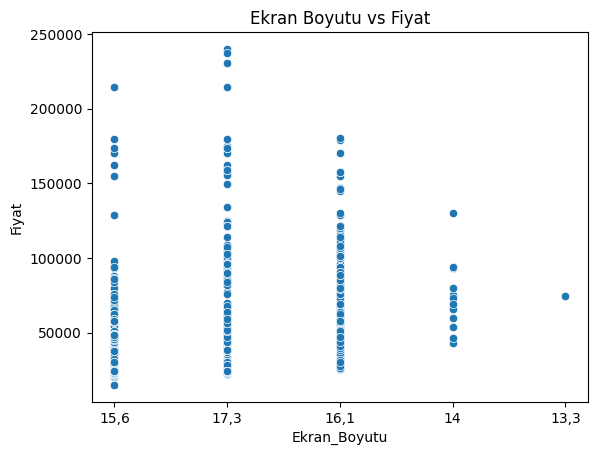

In [24]:
# Fiyat ile Ekran Boyutu arasındaki ilişkiyi görselleştirme
sns.scatterplot(data=df, x='Ekran_Boyutu', y='Fiyat')
plt.title('Ekran Boyutu vs Fiyat')
plt.show()

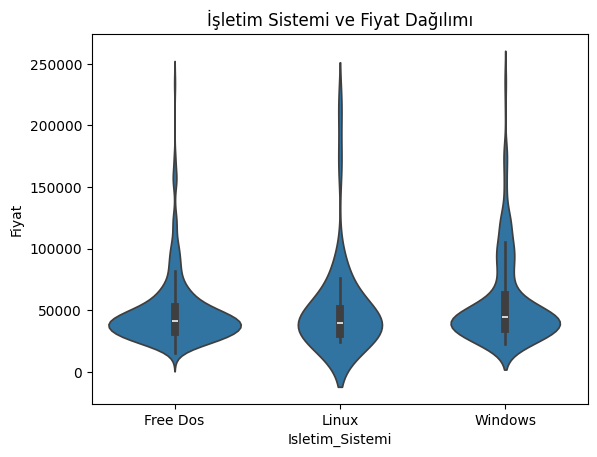

In [25]:
# İşletim Sistemi ve Fiyat dağılımı
sns.violinplot(data=df, x='Isletim_Sistemi', y='Fiyat')
plt.title('İşletim Sistemi ve Fiyat Dağılımı')
plt.show()

In [26]:
df["Panel_Tipi"].unique()

array(['IPS', 'VA', 'Full HD', 'LED', 'TN', 'OLED', 'WUXGA', 'Anti-Glare',
       'Mikro Kenarlı'], dtype=object)

In [27]:
list(df.columns)

['Ekran_Boyutu',
 'Ekran_Karti',
 'GPU_Bellek_Tipi',
 'GPU_Gucu',
 'GPU_Hafizasi',
 'GPU_Tipi',
 'Yenileme_Hizi',
 'Max_CPU_Hizi_GHz',
 'Panel_Tipi',
 'RAM',
 'RAM_Tipi',
 'Renk',
 'SSD_Kapasitesi',
 'CPU_Cekirdek_Sayisi',
 'Isletim_Sistemi',
 'Islemci',
 'Fiyat']

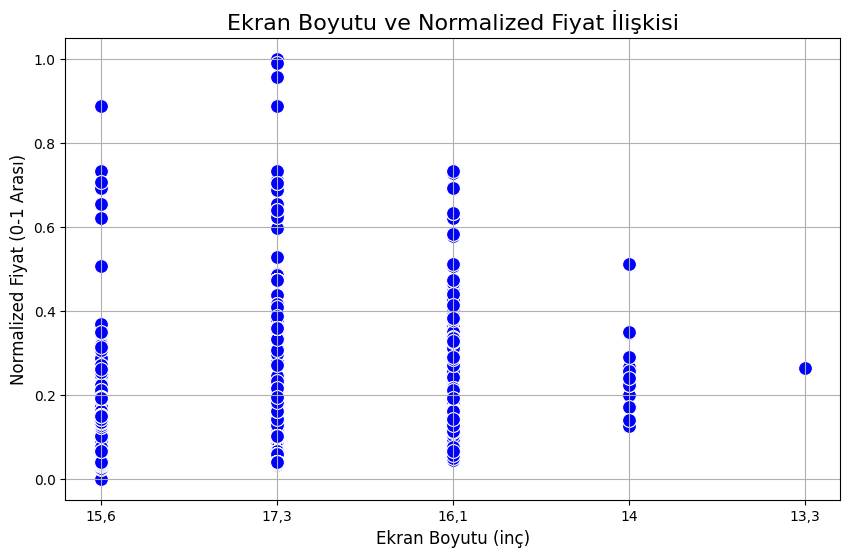

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16536\3396673425.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RAM', y='Fiyat_Normalize', data=df, palette='Set2')


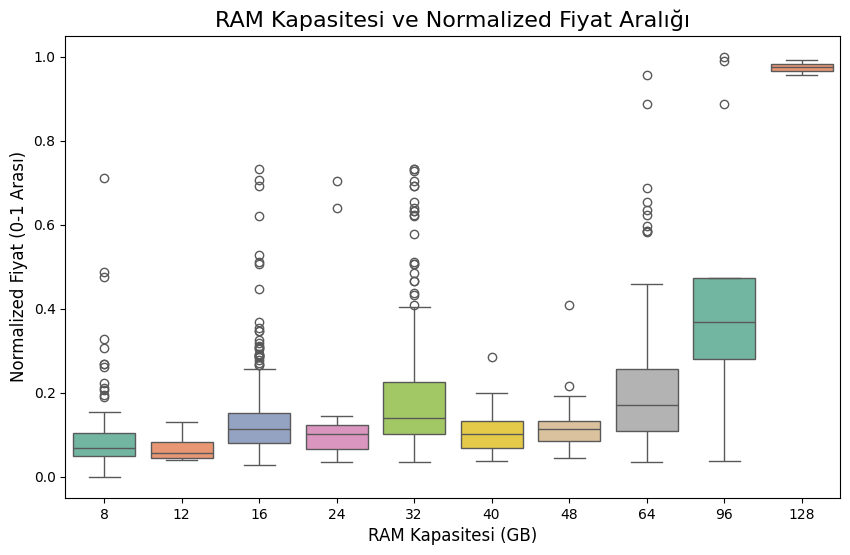

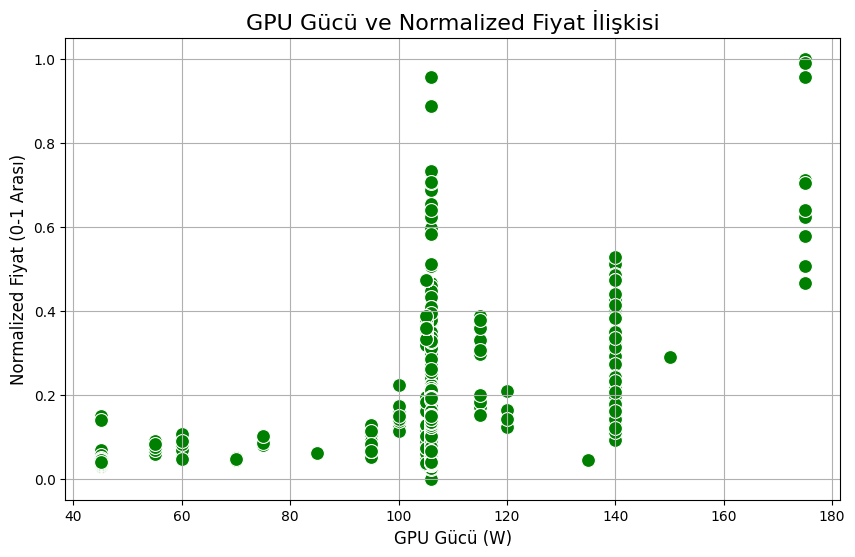

C:\Users\yusuf\AppData\Local\Temp\ipykernel_16536\3396673425.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SSD_Kapasitesi', y='Fiyat_Normalize', data=df, palette='viridis')


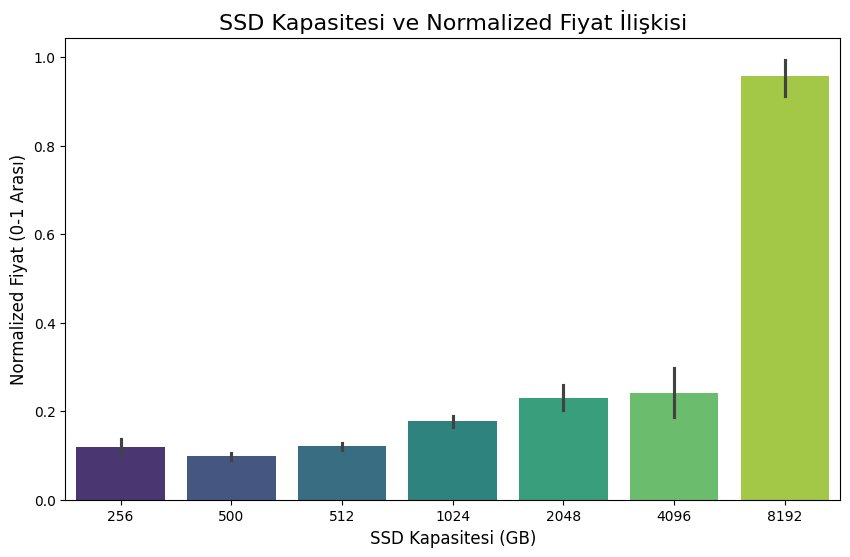

In [28]:
# Fiyat sütununu normalize etme
scaler = MinMaxScaler()
df['Fiyat_Normalize'] = scaler.fit_transform(df[['Fiyat']])

# 1. Ekran Boyutu vs. Normalized Fiyat (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ekran_Boyutu', y='Fiyat_Normalize', data=df, s=100, color='blue')
plt.title('Ekran Boyutu ve Normalized Fiyat İlişkisi', fontsize=16)
plt.xlabel('Ekran Boyutu (inç)', fontsize=12)
plt.ylabel('Normalized Fiyat (0-1 Arası)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Normalized Fiyat ve RAM Kapasitesi (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Fiyat_Normalize', data=df, palette='Set2')
plt.title('RAM Kapasitesi ve Normalized Fiyat Aralığı', fontsize=16)
plt.xlabel('RAM Kapasitesi (GB)', fontsize=12)
plt.ylabel('Normalized Fiyat (0-1 Arası)', fontsize=12)
plt.show()

# 3. GPU Gücü ve Normalized Fiyat İlişkisi (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GPU_Gucu', y='Fiyat_Normalize', data=df, s=100, color='green')
plt.title('GPU Gücü ve Normalized Fiyat İlişkisi', fontsize=16)
plt.xlabel('GPU Gücü (W)', fontsize=12)
plt.ylabel('Normalized Fiyat (0-1 Arası)', fontsize=12)
plt.grid(True)
plt.show()

# 4. SSD Kapasitesi vs. Normalized Fiyat (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='SSD_Kapasitesi', y='Fiyat_Normalize', data=df, palette='viridis')
plt.title('SSD Kapasitesi ve Normalized Fiyat İlişkisi', fontsize=16)
plt.xlabel('SSD Kapasitesi (GB)', fontsize=12)
plt.ylabel('Normalized Fiyat (0-1 Arası)', fontsize=12)
plt.show()